In [43]:
# Experiment Parameters

# Experiment conditions
# rewriter rules
use_all_rewriter_rules = True

# bigraph method
convert_bigraph = True

# NOT box model
not_representation = "X"
not_placement = "end"

# train NOT sentences
train_not_sentences = True

# load params
train_params = True
load_params = False
# params_saved = {'I__n_0': 1.3926202901320248, 'I__n_1': 0.008448820382520305, 'I__n_2': -0.6385783774702594, 'aw__n.r@s_0': 0.004878974097219957, 'aw__n@n.l_0': -1.710437394121971, 'bad__n.r@s_0': -2.0120646244526674, 'bad__n@n.l_0': -0.33328110433838587, 'bland__n.r@s_0': -1.8011492489090937, 'bland__n@n.l_0': -0.23301002690494765, 'cook__n.r@s@n.l_0': 2.666641605278804, 'cook__n.r@s@n.l_1': 0.35782850997078663, 'delici__n.r@s_0': -0.6784353476839611, 'delici__n@n.l_0': 2.5048532581915994, 'dislik__n.r@s@n.l_0': 1.264688638132907, 'dislik__n.r@s@n.l_1': 2.9058201511277773, 'fast__n.r@s_0': 1.5228059027468268, 'fast__n@n.l_0': 1.4318617692717328, 'food__n_0': 0.9510109180885518, 'food__n_1': 1.983545943335132, 'food__n_2': 0.31422754989262236, 'good__n.r@s_0': -0.37898061288101936, 'good__n@n.l_0': 0.3417258364922475, 'great__n.r@s_0': 0.32023762451562343, 'great__n@n.l_0': 1.9344786256084243, 'had__n.r@s@n.l_0': 0.9175005505289897, 'had__n.r@s@n.l_1': -1.126491771734188, 'hate__n.r@s@n.l_0': 1.0178843262642405, 'hate__n.r@s@n.l_1': -0.8544213946932742, 'impecc__n.r@s_0': 0.8774940821788493, 'impecc__n@n.l_0': 0.28533233081922516, 'like__n.r@s@n.l_0': 0.5238711836690633, 'like__n.r@s@n.l_1': -0.0248482491004431, 'love__n.r@s@n.l_0': -1.0716522290529822, 'love__n.r@s@n.l_1': 0.4674574117431039, 'meal__n_0': -0.2913227630628624, 'meal__n_1': -0.7824158049259571, 'meal__n_2': 2.364685233940882, 'nice__n.r@s_0': -0.31906215984000647, 'nice__n@n.l_0': -2.087345064482271, 'restaur__n_0': 1.9567881690203595, 'restaur__n_1': 0.35319298096689367, 'restaur__n_2': -0.5953604557383299, 'rude__n.r@s_0': 2.1631540155864895, 'rude__n@n.l_0': -0.9753409914505806, 'servic__n_0': -2.7047864895209357, 'servic__n_1': 1.2351321590961786, 'servic__n_2': -1.5851261977616085, 'show__n.r@s@n.l_0': -0.6393012792612347, 'show__n.r@s@n.l_1': 1.7857303585103954, 'slow__n.r@s_0': 0.5156333465906835, 'slow__n@n.l_0': 1.0425765284092643, 'staff__n_0': 0.08543447326700565, 'staff__n_1': -2.068154595353262, 'staff__n_2': 0.019379227469981927, 'tasti__n.r@s_0': 1.2246133069435021, 'tasti__n@n.l_0': 1.9668107229444722, 'terribl__n.r@s_0': -0.3440262636975905, 'terribl__n@n.l_0': 2.1861199395142688, 'unappet__n.r@s_0': 1.440589048292482, 'unappet__n@n.l_0': -0.31598863954665035, 'wa__s@s.l_0': -1.0244128683696618}

# training hyperparams
# SPSA hyperparams
spsa_a = 0.2
spsa_c = 0.06
# gamma = 0.928382463478119
spsa_n_iter = 10

# SVM type
kernel = 'rbf'
default_svm = True
optimize_svm = False

# Experiment metadata
experiment_name = "generalQC_H_CRx"
verbose = True

In [44]:
import os
import json

if (experiment_name == ""):
    experiment_name = "misc"

path = '../data/experiment_results/'+experiment_name

try:
    os.mkdir(path)
except:
    print("experiment folder already exists")

experiment folder already exists


In [45]:
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import nltk

In [46]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /home/quantum/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/quantum/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/quantum/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [47]:
try:
    with open(path+'/params.txt') as f:
        data = f.read().replace('\'', '\"')
        params_saved = json.loads(data)
except:
    params_saved = None
    train_params = False

In [48]:
import numpy as np

def read_data(filename):
    labels, sentences = [], []
    with open(filename) as f:
        for line in f:
            labels.append([1, 0] if line[0] == '1' else [0, 1])
            sentences.append(line[1:].strip())
    return np.array(labels), sentences

def read_data_no_not(filename, ref_data):
    labels, sentences = [], []
    with open(filename) as f:
        for line in f:
            if (line[1:].strip().find(" not ") == -1):
                labels.append([1, 0] if line[0] == '1' else [0, 1])
                sentences.append(line[1:].strip())
            else:
                sentence = line[1:].strip().replace(" not ", " ")
                if (sentence not in ref_data and sentence not in sentences):
                    labels.append([0, 1] if line[0] == '1' else [1, 0])
                    sentences.append(sentence)

    return np.array(labels), sentences

test_targets_src, test_data_src = read_data('../data/datasets/restaurant_v3_test.txt')

if (train_not_sentences):
    dev_targets_src, dev_data_src = read_data('../data/datasets/restaurant_v3_dev.txt')
    train_targets_src, train_data_src = read_data('../data/datasets/restaurant_v3_train.txt')
else:
    dev_targets_src, dev_data_src = read_data_no_not('../data/datasets/restaurant_v3_dev.txt', test_data_src)
    train_targets_src, train_data_src = read_data_no_not('../data/datasets/restaurant_v3_train.txt', test_data_src+dev_data_src)

In [138]:
# Helper function for converting to bigraph

from discopy.rigid import Id
''
def checkTrailingCups(diagram):
    scanWords = True
    
    for box in diagram.boxes:
        if not box.dom and not scanWords:
            return False
        else:
            scanWords = scanWords and not box.dom
    
    return True

def convertToTrailingCups(diagram):
    if (checkTrailingCups(diagram)):
        return diagram

    words = []
    cups = []
    
    for box in diagram.boxes:
        if not box.dom:
            words = words + [box]
        else:
            cups = [box] + cups
    
    new_diag = words[0]
    
    for i, word in enumerate(words):
        if i != 0:
            new_diag = new_diag >> new_diag.cod @ word
    
    for i, cup in enumerate(cups):
        if i != len(cups)-1:
            new_diag = new_diag >> new_diag.cod[:-2] @ cup
        else:
            new_diag = new_diag >> cup @ new_diag.cod[2:]
    
    return new_diag

In [114]:
# Fucntion for stemming and lemmatization of tokens

def to_word_tokens(data):
    return [word_tokenize(record) for record in data]

def build_stem_dictionary(data):
    port = PorterStemmer()
    wnet = WordNetLemmatizer()
    
    mapping = {}
    
    data_as_tokens = to_word_tokens(data)
    
    for words in data_as_tokens:
        for word in words:
            if word not in mapping:
                stemmed_word = port.stem(word)
                lemmatized_word = wnet.lemmatize(stemmed_word)
                
                mapping[word] = lemmatized_word
    
    return mapping

In [151]:
# Function for stemming and lemmatization of diagram boxes

from lambeq.rewrite import RewriteRule

class StemRewriteRule(RewriteRule):
    def __init__(self, data):
        self.mapping = build_stem_dictionary(data)
    
    def matches(self, box):
        return box.name in self.mapping

    def rewrite(self, box):
        new_name = self.mapping[box.name]
        return type(box)(name=new_name, dom=box.dom, cod=box.cod)

In [161]:
from lambeq.ansatz import CircuitAnsatz
from abc import abstractmethod
# from collections.abc import Mapping
from itertools import cycle
from typing import Callable, Optional, Tuple, Mapping
from discopy.quantum.circuit import (Circuit, Functor, Id, qubit)
from discopy.quantum.gates import Bra, H, Ket, Rx, Ry, Rz
from discopy.rigid import Box, Diagram, Ty
from discopy.tensor import Dim, Tensor
import numpy as np
from sympy import Symbol, symbols

class SimpleSA(Circuit):
    def __init__(self, n_qubits, params):
        from discopy.quantum.gates import H, Rx, Rz, CX, Ry

        if n_qubits == 1:
            if len(params) == 0:
                circuit = Id(1)
            else:
                circuit = Rx(params[0]) >> Rz(params[1]) >> Rx(params[2])
        elif len(np.shape(params)) != 2\
                or np.shape(params)[1] != n_qubits - 1:
            raise ValueError(
                "Expected params of shape (depth, {})".format(n_qubits - 1))
        else:
            depth = np.shape(params)[0]
            circuit = Id(n_qubits)

            for thetas in params:
                hadamards = Id().tensor(*(n_qubits * [H]))
                rotations = Id(n_qubits).then(*(
                    (Id(i) @ CX @ Id(n_qubits - 2 - i)) >> (Id(i + 1) @ Rz(thetas[i]) @ Id(n_qubits - 2 - i) >> (Id(i + 1) @ H @ Id(n_qubits - 2 - i)))
                    for i in range(n_qubits - 1)))
                circuit >>= hadamards >> rotations

        super().__init__(circuit.dom, circuit.cod, circuit.boxes, circuit.offsets)

class SimpleSAAnsatz(CircuitAnsatz):
    def __init__(self, ob_map: Mapping[Ty, int], n_layers: int, n_single_qubit_params: int = 0, discard: bool = False) -> None:
        super().__init__(ob_map, n_layers, n_single_qubit_params, SimpleSA, discard, [Rx, Rz], H)

    def params_shape(self, n_qubits: int) -> Tuple[int, ...]:
        return (self.n_layers, n_qubits - 1)

class Sim15SA(Circuit):
    def __init__(self, n_qubits, params):
        from discopy.quantum.gates import CX, Ry

        params_shape = np.shape(params)

        if n_qubits == 1:
            if len(params) == 0:
                circuit = Id(1)
            else:
                circuit = Rx(params[0]) >> Rz(params[1]) >> Rx(params[2])
        elif (len(params_shape) != 2) or (params_shape[1] != 2 * n_qubits):
            raise ValueError(
                "Expected params of shape (depth, {})".format(2 * n_qubits))
        else:
            depth = params_shape[0]
            circuit = Id(n_qubits)

            for thetas in params:
                sublayer1 = Id().tensor(*map(Ry, thetas[:n_qubits]))

                for i in range(n_qubits):
                    src = i
                    tgt = (i - 1) % n_qubits
                    sublayer1 = sublayer1.CX(src, tgt)

                sublayer2 = Id().tensor(*map(Ry, thetas[n_qubits:]))

                for i in range(n_qubits, 0, -1):
                    src = i % n_qubits
                    tgt = (i + 1) % n_qubits
                    sublayer2 = sublayer2.CX(src, tgt)

                circuit >>= sublayer1 >> sublayer2

        super().__init__(
            circuit.dom, circuit.cod, circuit.boxes, circuit.offsets)

class Sim15SAAnsatz(CircuitAnsatz):
    def __init__(self, ob_map: Mapping[Ty, int], n_layers: int, n_single_qubit_params: int = 0, discard: bool = False) -> None:
        super().__init__(ob_map, n_layers, n_single_qubit_params, Sim15SA, discard, [Rx, Rz])

    def params_shape(self, n_qubits: int) -> Tuple[int, ...]:
        return (self.n_layers, 2 * n_qubits)

In [162]:
class HCRxLayer(Circuit):
    def __init__(self, n_qubits, params):
        from discopy.quantum.gates import H, CRx

        params_shape = np.shape(params)

        if n_qubits == 1:
            # circuit = Rx(params[0]) >> Rz(params[1]) >> Rx(params[2])
            circuit = Id(1)
        elif (len(params_shape) != 2) or (params_shape[1] != n_qubits):
            raise ValueError(
                "Expected params of shape (depth, {})".format(n_qubits))
        else:
            depth = params_shape[0]
            circuit = Id(n_qubits)

            for thetas in params:
                sublayer1 = Id().tensor(*([H for _ in range(n_qubits)]))

                for i in range(n_qubits):
                    src = i
                    tgt = (i - 1) % n_qubits
                    sublayer1 = sublayer1.CRx(thetas[i], src, tgt)

                sublayer2 = Id().tensor(*([H for _ in range(n_qubits)]))

                for i in range(n_qubits, 0, -1):
                    src = i % n_qubits
                    tgt = (i + 1) % n_qubits
                    sublayer2 = sublayer2.CRx(thetas[-i], src, tgt)

                circuit >>= sublayer1 >> sublayer2

        super().__init__(
            circuit.dom, circuit.cod, circuit.boxes, circuit.offsets)

class HCRzLayer(Circuit):
    def __init__(self, n_qubits, params):
        from discopy.quantum.gates import H, CRz

        params_shape = np.shape(params)

        if n_qubits == 1:
            # circuit = Rx(params[0]) >> Rz(params[1]) >> Rx(params[2])
            circuit = Id(1)
        elif (len(params_shape) != 2) or (params_shape[1] != n_qubits):
            raise ValueError(
                "Expected params of shape (depth, {})".format(n_qubits))
        else:
            depth = params_shape[0]
            circuit = Id(n_qubits)

            for thetas in params:
                sublayer1 = Id().tensor(*([H for _ in range(n_qubits)]))

                for i in range(n_qubits):
                    src = i
                    tgt = (i - 1) % n_qubits
                    sublayer1 = sublayer1.CRz(thetas[i], src, tgt)

                sublayer2 = Id().tensor(*([H for _ in range(n_qubits)]))

                for i in range(n_qubits, 0, -1):
                    src = i % n_qubits
                    tgt = (i + 1) % n_qubits
                    sublayer2 = sublayer2.CRz(thetas[-i], src, tgt)

                circuit >>= sublayer1 >> sublayer2

        super().__init__(
            circuit.dom, circuit.cod, circuit.boxes, circuit.offsets)

class HCRxLayerV2(Circuit):
    def __init__(self, n_qubits, params):
        from discopy.quantum.gates import H, CRx

        params_shape = np.shape(params)

        if n_qubits == 1:
            # circuit = Rx(params[0]) >> Rz(params[1]) >> Rx(params[2])
            circuit = Id(1)
        elif (len(params_shape) != 2) or (params_shape[1] != 2*n_qubits):
            raise ValueError(
                "Expected params of shape (depth, {})".format(n_qubits))
        else:
            depth = params_shape[0]
            circuit = Id(n_qubits)

            for thetas in params:
                sublayer1 = Id().tensor(*([H for _ in range(n_qubits)]))

                for i in range(n_qubits):
                    src = i
                    tgt = (i - 1) % n_qubits
                    sublayer1 = sublayer1.CRx(thetas[i], src, tgt)

                sublayer2 = Id().tensor(*([H for _ in range(n_qubits)]))

                for i in range(n_qubits, n_qubits*2):
                    src = i % n_qubits
                    tgt = (i + 1) % n_qubits
                    sublayer2 = sublayer2.CRx(thetas[i], src, tgt)

                circuit >>= sublayer1 >> sublayer2

        super().__init__(
            circuit.dom, circuit.cod, circuit.boxes, circuit.offsets)

class HCRzLayerV2(Circuit):
    def __init__(self, n_qubits, params):
        from discopy.quantum.gates import H, CRz

        params_shape = np.shape(params)

        if n_qubits == 1:
            # circuit = Rx(params[0]) >> Rz(params[1]) >> Rx(params[2])
            circuit = Id(1)
        elif (len(params_shape) != 2) or (params_shape[1] != 2*n_qubits):
            raise ValueError(
                "Expected params of shape (depth, {})".format(n_qubits))
        else:
            depth = params_shape[0]
            circuit = Id(n_qubits)

            for thetas in params:
                sublayer1 = Id().tensor(*([H for _ in range(n_qubits)]))

                for i in range(n_qubits):
                    src = i
                    tgt = (i - 1) % n_qubits
                    sublayer1 = sublayer1.CRz(thetas[i], src, tgt)

                sublayer2 = Id().tensor(*([H for _ in range(n_qubits)]))

                for i in range(n_qubits, 2*n_qubits, -1):
                    src = i % n_qubits
                    tgt = (i + 1) % n_qubits
                    sublayer2 = sublayer2.CRz(thetas[i], src, tgt)

                circuit >>= sublayer1 >> sublayer2

        super().__init__(
            circuit.dom, circuit.cod, circuit.boxes, circuit.offsets)

class GeneralQCAnsatzV1(CircuitAnsatz):
    def __init__(self, ob_map: Mapping[Ty, int], n_layers: int, n_single_qubit_params: int = 0, discard: bool = False) -> None:
        super().__init__(ob_map, n_layers, n_single_qubit_params, HCRxLayer, discard, [Rx, Rz], H)

    def params_shape(self, n_qubits: int) -> Tuple[int, ...]:
        return (self.n_layers, n_qubits)

class GeneralQCAnsatzV2(CircuitAnsatz):
    def __init__(self, ob_map: Mapping[Ty, int], n_layers: int, n_single_qubit_params: int = 0, discard: bool = False) -> None:
        super().__init__(ob_map, n_layers, n_single_qubit_params, HCRzLayerV2, discard, [Rx, Rz], H)

    def params_shape(self, n_qubits: int) -> Tuple[int, ...]:
        return (self.n_layers, 2*n_qubits)

In [163]:
from lambeq import BobcatParser, Rewriter, remove_cups
from discopy import grammar
from discopy.quantum.gates import X, Z
from discopy import rigid

def sentences_to_circuits(sentences, ansatz, convert_bigraph=True, not_representation="X", all_sentences=None, return_valids_mask=True):
    ### SENTENCES TO DIAGRAMS ###

    if all_sentences is None:
        all_sentences = sentences
    
    # syntax tree parsing
    parser = BobcatParser()
    raw_diagrams = parser.sentences2diagrams([text.replace(" not ", " ") for text in sentences])

    # filter valid diagrams type S
    n_sent = len(sentences)

    valids_mask = np.array([d.cod.name == Ty('s').name for d in raw_diagrams])
    data = [sentences[i] for i in range(n_sent) if valids_mask[i]]
    use_diagrams = [raw_diagrams[i] for i in range(n_sent) if valids_mask[i]]

    # grammatical rewrite rules
    rewriter = Rewriter()
    rewritten_diagrams = [rewriter(diagram) for diagram in use_diagrams]

    # bigraph method
    normalised_diagrams = [convertToTrailingCups(diagram.normal_form()) for diagram in rewritten_diagrams]

    removed_diagrams = [remove_cups(diagram) for diagram in normalised_diagrams]

    # stemming and lemmatization
    stemmed_diagrams = [Rewriter([StemRewriteRule(all_sentences)])(diagram) for diagram in removed_diagrams]

    # final diagrams
    diagrams = [diagram for diagram in stemmed_diagrams]

    ### DIAGRAMS to CIRCUITS ###

    # string diagrams to raw quantum circuits
    circuits = [ansatz(diagram) for diagram in diagrams]

    # apply NOT box to circuits
    for i, circuit in enumerate(circuits):
        if data[i].find(" not ") != -1:
            if (not_representation == "ZX"):
                circuits[i] = circuit >> Z >> X
            else:
                circuits[i] = circuit >> X
    
    if return_valids_mask:
        return data, diagrams, circuits, valids_mask
    else:
        return data, diagrams, circuits

In [166]:
from lambeq import AtomicType, IQPAnsatz

# Define atomic types
N = AtomicType.NOUN
S = AtomicType.SENTENCE

# Convert string diagram to quantum circuit
# ansatz = GeneralQCAnsatzV1({N: 1, S: 1}, n_layers=1)
ansatz = IQPAnsatz({N: 1, S: 1}, n_layers=1)

In [168]:
train_data, train_diagrams, train_circuits, train_valids_mask = sentences_to_circuits(train_data_src, ansatz)
dev_data, dev_diagrams, dev_circuits, dev_valids_mask = sentences_to_circuits(dev_data_src, ansatz)
test_data, test_diagrams, test_circuits, test_valids_mask = sentences_to_circuits(test_data_src, ansatz)

Tagging sentences:   0%|          | 0/43 [00:00<?, ?it/s]

Parsing tagged sentences:   0%|          | 0/170 [00:00<?, ?it/s]

Parse trees to diagrams:   0%|          | 0/170 [00:00<?, ?it/s]

Tagging sentences:   0%|          | 0/13 [00:00<?, ?it/s]

Parsing tagged sentences:   0%|          | 0/50 [00:00<?, ?it/s]

Parse trees to diagrams:   0%|          | 0/50 [00:00<?, ?it/s]

Tagging sentences:   0%|          | 0/15 [00:00<?, ?it/s]

Parsing tagged sentences:   0%|          | 0/60 [00:00<?, ?it/s]

Parse trees to diagrams:   0%|          | 0/60 [00:00<?, ?it/s]

In [169]:
train_targets = [train_targets_src[i] for i, mask in enumerate(train_valids_mask) if mask]
dev_targets = [dev_targets_src[i] for i, mask in enumerate(dev_valids_mask) if mask]
test_targets = [test_targets_src[i] for i, mask in enumerate(test_valids_mask) if mask]

In [170]:
from pytket.extensions.qiskit import AerBackend

In [171]:
## CONFIGURE BACKEND
# This uses Qiskit, which requires installing `pytket-qiskit`.
# For more information on how to use pytket with different backends, see:
# https://cqcl.github.io/pytket/build/html/extensions/

# Aer is a shots-based backend that is always available.

backend = AerBackend()

## Having an IBMQ account gives access to the IBM emulator for noisy simulations:
#
# from pytket.extensions.qiskit import IBMQEmulatorBackend
# backend = IBMQEmulatorBackend('PLACEHOLDER')
#
## To use a real device:
#
# from pytket.extensions.qiskit import IBMQBackend
# backend = IBMQBackend('PLACEHOLDER')

backend_config = {
    'backend': backend,
    'compilation': backend.default_compilation_pass(2),
    'n_shots': 8192  # maximum recommended shots, reduces sampling error
}

In [176]:
from discopy.quantum import Circuit, Id, Measure

def randint(rng, low=-1 << 63, high=1 << 63-1):
    return rng.integers(low, high)

def normalise(predictions):
    # apply smoothing to predictions
    predictions = np.abs(predictions) + 1e-9
    return predictions / predictions.sum()

def make_pred_fn(circuits, parameters, rng):
    measured_circuits = [c >> Id().tensor(*[Measure()] * len(c.cod)) for c in circuits]
    circuit_fns = [c.lambdify(*parameters) for c in measured_circuits]

    def predict(params):
        outputs = Circuit.eval(*(c_fn(*params) for c_fn in circuit_fns),
                               **backend_config, seed=randint(rng))
        return np.array([normalise(output.array) for output in outputs])
    return predict

In [177]:
from noisyopt import minimizeSPSA
import time
import csv
import matplotlib.pyplot as plt
from sympy import default_sort_key
import gc

class Result:
    def __init__(self, x):
        self.x = x

def make_cost_fn(pred_fn, labels, directory, name):
    with open(f'{directory}/{name}_costs.csv', 'w') as f:
        pass
    
    with open(f'{directory}/{name}_accs.csv', 'w') as f:
        pass

    with open(f'{directory}/params_raw.txt', 'w') as f:
        pass
    
    def cost_fn(params, **kwargs):
        predictions = pred_fn(params)

        cost = -np.sum(labels * np.log(predictions)) / len(labels)  # binary cross-entropy loss
        
        with open(f'{directory}/{name}_costs.csv', 'a') as f:
            writer = csv.writer(f)

            writer.writerow([cost])

            f.close()

        acc = np.sum(np.round(predictions) == labels) / len(labels) / 2  # half due to double-counting
        
        with open(f'{directory}/{name}_accs.csv', 'a') as f:
            writer = csv.writer(f)

            writer.writerow([acc])

            f.close()
        
        if name == "dev":
            gc.collect()

        return cost

    return cost_fn

def run_circuit_optimization(train_circuits, train_targets, dev_circuits, dev_targets, test_circuits, test_targets, experiment_name, load_params=False):
    # collect params

    all_circuits = train_circuits + dev_circuits + test_circuits

    # sort the symbols since they are returned as a set
    parameters = sorted(
        {s for circ in all_circuits for s in circ.free_symbols},
        key=default_sort_key)
    
    # make prediction and cost functions

    SEED = 0
    rng = np.random.default_rng(SEED)

    train_pred_fn = make_pred_fn(train_circuits, parameters, rng)
    dev_pred_fn = make_pred_fn(dev_circuits, parameters, rng)
    test_pred_fn = make_pred_fn(test_circuits, parameters, rng)

    train_cost_fn = make_cost_fn(train_pred_fn, train_targets, '../data/experiment_results/'+experiment_name, 'train')
    dev_cost_fn = make_cost_fn(dev_pred_fn, dev_targets, '../data/experiment_results/'+experiment_name, 'dev')

    if (load_params):
        # load params

        x0 = [params_saved[str(param)] for param in parameters]
        result = Result(x0)
    else:
        x0 = np.array(rng.random(len(parameters)))
        np.random.seed(SEED)

    # train params using SPSA
    
    start_time = time.time()
    # result = minimizeSPSA(train_cost_fn, x0=x0, a=spsa_a, c=spsa_c, niter=10, callback=dev_cost_fn)
    if train_params:
        result = minimizeSPSA(train_cost_fn, x0=x0, a=spsa_a, c=spsa_c, niter=spsa_n_iter, callback=dev_cost_fn)
    
    finish_time = time.time()

    with open(f'../data/experiment_results/{experiment_name}/fit_time.txt', 'w') as f:
        f.write(str(finish_time-start_time))

    train_costs = []
    train_accs = []
    dev_costs = []
    dev_accs = []

    with open(f'../data/experiment_results/{experiment_name}/train_costs.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')

        for row in csv_reader:
            train_costs.append(float(row[0]))

    with open(f'../data/experiment_results/{experiment_name}/train_accs.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')

        for row in csv_reader:
            train_accs.append(float(row[0]))

    with open(f'../data/experiment_results/{experiment_name}/dev_costs.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')

        for row in csv_reader:
            dev_costs.append(float(row[0]))

    with open(f'../data/experiment_results/{experiment_name}/dev_accs.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')

        for row in csv_reader:
            dev_accs.append(float(row[0]))

    if train_params:
        print("Fit time:", finish_time-start_time)
        
        fig, ((ax_tl, ax_tr), (ax_bl, ax_br)) = plt.subplots(2, 2, sharex=True, sharey='row', figsize=(10, 6))
        ax_tl.set_title('Training set')
        ax_tr.set_title('Development set')
        ax_bl.set_xlabel('Iterations')
        ax_br.set_xlabel('Iterations')
        ax_bl.set_ylabel('Accuracy')
        ax_tl.set_ylabel('Loss')

        colours = iter(plt.rcParams['axes.prop_cycle'].by_key()['color'])
        ax_tl.plot(train_costs[1::2], color=next(colours))  # training evaluates twice per iteration
        ax_bl.plot(train_accs[1::2], color=next(colours))   # so take every other entry
        ax_tr.plot(dev_costs, color=next(colours))
        ax_br.plot(dev_accs, color=next(colours))

    # print test accuracy
    test_cost_fn = make_cost_fn(test_pred_fn, test_targets, '../data/experiment_results/'+experiment_name, 'test')
    test_cost_fn(result.x)

    with open(f'../data/experiment_results/{experiment_name}/test_accs.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')

        for row in csv_reader:
            print('Test accuracy:', row[0])
            test_accs = [row[0]]
            break
    
    paramdict = {}
    paramdict_print = {}

    for value, parameter in zip(result.x, parameters):
        paramdict[parameter] = value
        paramdict_print[str(parameter)] = value

    with open('../data/experiment_results/'+experiment_name+'/params.txt', 'w') as f:
        f.write(str(paramdict_print))

    # print(paramdict_print)

    opt_results = {"params": {"parameters": parameters, "x": result.x}, "train": {"pred_fn": train_pred_fn, "cost_fn": train_cost_fn, "accs": train_accs[1::2], "costs": train_costs[1::2]}, "dev": {"pred_fn": dev_pred_fn, "cost_fn": dev_cost_fn, "accs": dev_accs, "costs": dev_costs}, "test": {"pred_fn": test_pred_fn, "cost_fn": test_cost_fn, "accs": test_accs, "costs": None}}

    return opt_results

Fit time: 349.08432245254517
Test accuracy: 0.4166666666666667


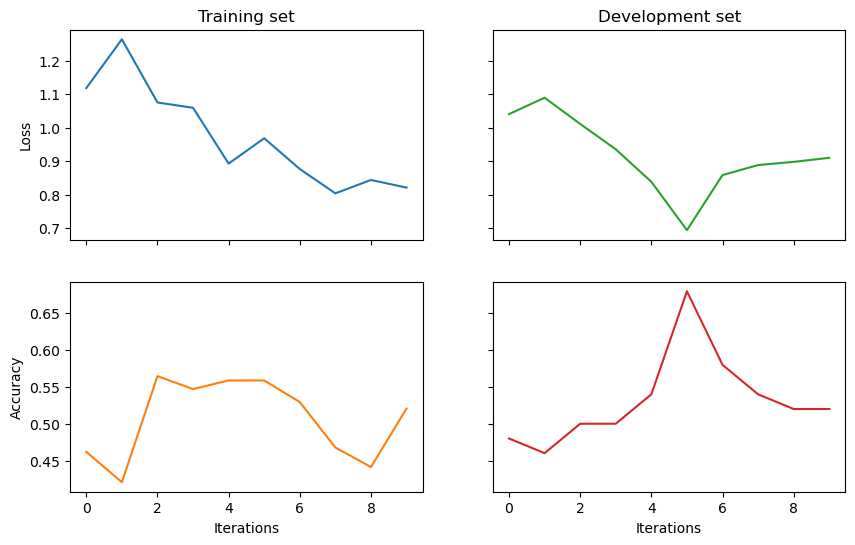

In [178]:
opt_results = run_circuit_optimization(train_circuits, train_targets, dev_circuits, dev_targets, test_circuits, test_targets, experiment_name, load_params)

train_pred_fn, train_cost_fn, train_accs, train_costs = list(opt_results["train"].values())
dev_pred_fn, dev_cost_fn, dev_accs, dev_costs = list(opt_results["dev"].values())
test_pred_fn, test_cost_fn, test_accs, test_costs = list(opt_results["test"].values())
parameters, x = list(opt_results["params"].values())

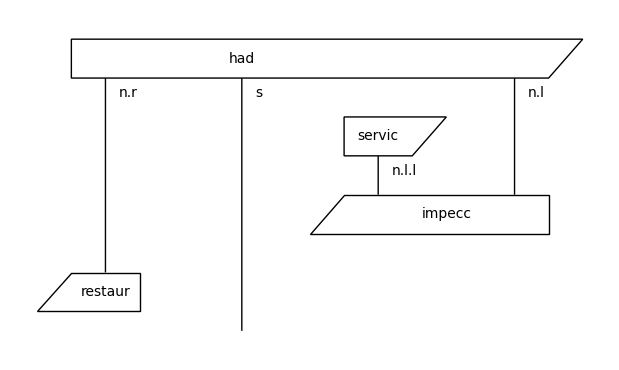

In [179]:
# String diagram of "the restaurant had impeccable service"
train_diagrams[86].draw(figsize=(6, 3.5))

In [180]:
test_preds = test_pred_fn(x)

In [ ]:
measured_circuits = [c >> Id().tensor(*[Measure()] * len(c.cod)) for c in test_circuits]
circuit_fns = [c.lambdify(*parameters) for c in measured_circuits]

instantiated_circuits = [c_fn(*x) for c_fn in circuit_fns]

In [ ]:
acc = 0

for i in [1, 7, 12, 15, 21, 24]:
    if test_targets[i][0]*test_preds[i][0]+test_targets[i][1]*test_preds[i][1] >= 0.5:
        acc += 1
    pred = np.array([round(test_preds[i][0]), round(test_preds[i][1])], dtype=int)
    print(i)
    print("Sentence\t: "+str(test_data[i]))
    print("Label\t\t: "+str(test_targets[i]))
    print("Prediction\t: "+str(pred))
    print("Measured state\t: "+str(test_preds[i]))
    instantiated_circuits[i].draw()

In [ ]:
sentences =["The restaurant cooked good food", "The restaurant cooked bad food"]

# PRECONDITION all words within model vocabulary
# nouns/pronouns: I, restaurant, food, meal, service, staff
# verbs: be, have, cook, show
# adjectives: good, great, nice, delicious, tasty, fast, impeccable, bad, terrible, awful, unappetizing, bland, slow, rude

In [ ]:
new_data, new_diagrams, new_circuits, _ = sentences_to_circuits(sentences, ansatz)

circuits = [c for c in new_circuits]
measured_circuits = [c >> Id().tensor(*[Measure()] * len(c.cod)) for c in circuits]
circuit_fns = [c.lambdify(*parameters) for c in measured_circuits]

instantiated_circuits = [c_fn(*x) for c_fn in circuit_fns]

In [ ]:
SEED = 0
rng = np.random.default_rng(SEED)

outputs = Circuit.eval(*(c_fn(*x) for c_fn in circuit_fns), **backend_config, seed=randint(rng))
res = np.array([normalise(output.array) for output in outputs])

In [ ]:
for i in range(len(new_data)):
    print("Sentence\t: "+str(new_data[i]))
    print("Prediction\t: "+str(res[i]), end=" ")
    if res[i][0] > 0.5:
        print("(positive)")
    else:
        print("(negative)")
    instantiated_circuits[i].draw()